In [1]:
from prerequisites import *

# Chapter 3 Chaos
***

## Chapter 3.1 Lyapunov exponents
***

### Lyapunov number and exponent
*Tldr*: The Lyapunov number tells us by how many times does the distance to a nearby point increase after one iteration of the map, on average.
**Def**: Let $f:\mathbb{R}\rightarrow \mathbb{R}$ be a smooth map. The **Lyapunov number** $L(x_1)$ of the orbit 
$\{x_1,x_2,\ldots\}$ is defined as
$$L(x_1) = \lim_{n\rightarrow\infty} \left(|f^{\prime}(x_1)||f^{\prime}(x_2)|\cdot\ldots\cdot|f^{\prime}(x_n)|\right)^{\frac{1}{n}}$$
if this limit exists.  
The **Lyapunov exponent** $h(x_1)$ is defined as
$$h(x_1) = \lim_{n\rightarrow\infty} \frac{1}{n} \sum_{i=1}^n \ln\left(\left|f^{\prime}(x_i)\right|\right)$$
if this limit exists.  
Rem: $h$ exists if and only if $L$ exists and is nonzero, and in such cases $\ln(L)=h$.  
Example: Let $f(x) = 3x(1-x)$, then we can investigate the Lyapunov number of the point $x_0=0.1$ numerically:

The lyapunov number of 0.1 is 0.9745430662799
The lyapunov exponent of 0.1 is -0.025786567804342346


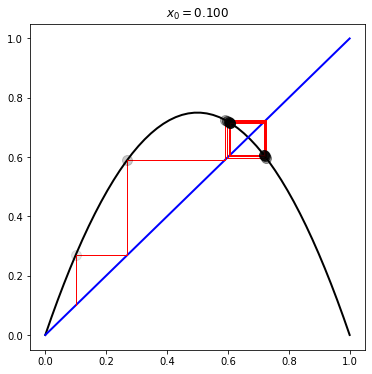

In [2]:
def f(x):
    return 3*x*(1-x)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
cobweb_plot(0.1, f, None, 0, 1, 10, ax=ax);
print("The lyapunov number of 0.1 is", lyapunov_number(0.1, f, None, 100))
print("The lyapunov exponent of 0.1 is", lyapunov_exponent(0.1, f, None, 100))

### Exercise T3.1
> Show that if the Lyapunov number of the orbit of $x_11$ under the map $f$ is
> $L$, then the Lyapunov number of the orbit of $x_1$ under the map $f^k$ is $L^k$,
> whether or not $x_1$ is periodic

*Proof*: This is a straightforward calculation. If $\{x_1,x_2,\ldots \}$ is the orbit of $x_1$ under $f$, then $\{x_1, x_{k+1}, x_{2k+1},\ldots\}$ is the orbit under $f^k$ and so the Lyapunov number of $x_1$ under $f^k$ is
$$\lim_{n\rightarrow \infty} \prod_{i=1}^n \left|f^k(x_{i\cdot k+1})^{\prime}\right|^{1/n}=
\lim_{n\rightarrow \infty} \prod_{i=1}^n \prod_{j=i\cdot k + 1}^{(i+1)\cdot k} \left|f(x^{\prime}_{j})\right|^{1/n} = 
\left(\lim_{nk\rightarrow \infty} \prod_{i=1}^{nk} \left|f(x^{\prime}_{i})\right|^{1/(nk)}\right)^k = L^k$$


### Periodic, eventually periodic and asymptotically periodic
**Def**: An orbit $\{x_1, x_2, \ldots\}$ is 
 * **periodic** if $x_{k+1} = x_1$ for some $k\in\mathbb{N}$.  
 * **eventually periodic** if $x_{a+k} = x_{a}$ for some $a,k\in\mathbb{N}$.  
 * **asymptotically periodic** if there exists a periodic orbit $\{y_1, y_2,\ldots\}$ s.t. $|x_n-y_n|\rightarrow 0$ as $n\rightarrow \infty$.


### Theorem 3.4
**Thm**: Let $f:\mathbb{R}\rightarrow\mathbb{R}$ be a map. If the orbit $\{x_1, x_2, \ldots\}$ of $f$ satisfies $f^{\prime}(x_i) \neq 0$ for all $i$ and is asymptotically periodic to the periodic orbit
$\{y_1, y_2, \ldots\}$, then the two orbits have identical Lyapunov exponents, assuming both
exist.  
*Proof*:

### Exercise T3.2
> Find the Lyapunov exponent shared by most bounded orbits of $g(x)=2.5x(1- x)$. Begin by sketching $g(x)$ and considering the graphical representation of orbits. What are the possible bounded asymptotic behaviors? Do all bounded orbits have the same Lyapunov exponents?

*Proof*: The fixed points of $g$ are given by $x = 2.5x(1-x)\Longrightarrow x(2.5x-1.5)=0$, so $x = 0$ and $x = 0.6$ are fixed points of $f$. Now let us consider their stability: $|f^{\prime}(x)| = |2.5(1-2x)|$, so $|f^\prime(0)| = 2.5>0$ is unstable and $|f^\prime(0.6)| = 0.5 < 1$, so $0.6$ is stable.  

Now we wish to determine the basin of attraction of $0.6$, for this consider $x_n = 0.6+\varepsilon_n$ where $-0.6 < \varepsilon_n < 0.4$, then $$|\varepsilon_{n+1}|=|0.6-g(0.6+\varepsilon_n)| = |0.6-2.5(0.6+\varepsilon_n)(0.4-\varepsilon_n)|=|0.6-2.5(0.24-0.2\varepsilon_n-\varepsilon_n^2)|=|\varepsilon_n||0.5+\varepsilon_n| < 0.9|\varepsilon_n|$$, as $0 \leq |0.5+\varepsilon_n| < 0.9$, therefore $\varepsilon_n\rightarrow 0$, so any point in $(0,1)$ converges to $0.6$, i.e. $(0,1)$ is the basin of attraction of $0.6$. And the basin of attraction of $0$ is $\{0,1\}$.

Therefore we see that all points in $(0,1)$ have asymptotically periodic orbits converging to the constant orbit of $0.6$, and therefore have Lyapunov number $L(x) = L(0.6)= \lim_{n\rightarrow \infty}\prod_{i=1}^n |f^\prime(0.6)| = \frac{1}{2}$, and so Lyapunov exponent $h(x) = h(0.6)=-\ln(2)\approx -0.693<0$.

The points $\{0,1\}$ have $L(1)=L(0) = 2.5$ and $h(1)=h(0)=\ln(2.5)\approx 0.916$.

Note that if $x > 1$, then $f(x) = 2.5x(1-x) < 0$, and if $x < 0$, then $|f(x)| = 2.5|x||1-x| > 2.5|x|$, as $1-x > 1$, so all $x\in(-\infty, 0)\cup (1,\infty)$ diverge to $-\infty$, and so do not give rise to bounded orbits.

L(0.1)= -0.6930133253575416
L(0.6)= -0.6932164952786478


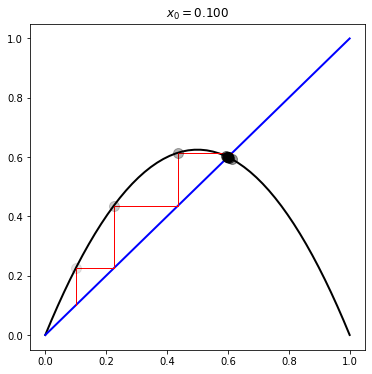

In [3]:
def f(x):
    return 2.5*x*(1-x)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
cobweb_plot(0.1, f, None, 0, 1, 10, ax=ax);
print("L(0.1)=", lyapunov_exponent(0.1,f,None,10000))
print("L(0.6)=", lyapunov_exponent(0.6,f,None,10000))

### Computer experiment 3.1
> Write a program to calculate the Lyapunov exponent of $g_a(x) = ax(1-x)$
for values of the parameter a between $2$ and $4$. Graph the results as a function
of $a$.

We implement the algorithm in the obvious manner. The question does not specify what initial condition we should use, so I tried a few different values.

As can be seen from the plots, the initial value did not affect the results.

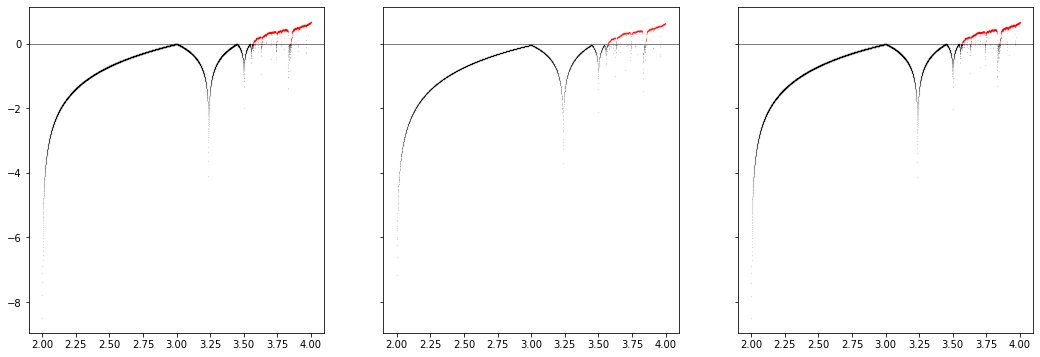

In [4]:
def ga(x, a):
    return a*x*(1-x)
a = np.linspace(2, 4, 10000)
x0s = [0.1, 0.5, 0.8]
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
for i in range(3):
    axs[i].axhline(0, color='k', lw=0.5)
    h = lyapunov_exponent(x0s[i], ga, a, 1000);
    axs[i].plot(a[h<0], h[h<0], '.k', ms = 0.1)
    axs[i].plot(a[h>0], h[h>0], '.r', ms = 0.1)
    

## Chapter 3.2 Chaotic Orbits
***

### Chaotic orbits
**Def**: Let $f:\mathbb{R}\rightarrow \mathbb{R}$ be a map and $\{x_1, x_2, x_3, \ldots\}$ be a bounded orbit. The orbit is called **chaotic** if two things hold:  
1. The orbit is not asymptotically periodic
2. The Lyapunov exponent $h(x_1)>0$

### Exercise T3.3
> Let $f(x) = (x + q) (mod 1)$, where $q$ is irrational. Verify that $f$ has no
periodic orbits and that the Lyapunov exponent of each orbit is $0$.

*Proof*: Assume there were a period $k$ orbit, then $f^k(x) = x$ for some $x$, i.e. $x+kq (mod 1) = x\Rightarrow kq (mod 1) = 0\Rightarrow kq\in \mathbb{Z}$, but this implies that $q\in\mathbb{Q}$ a contradiction. $f'(x) = 1$ ar every point where the function is cts, therefore $h(x) = \ln(1) = 0$ for all $x$.